In [1]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import multianndata as mad
import cna
import scanpy as sc
from matplotlib import pyplot as plt

In [2]:
# parameters
resolution = "major_cell_types"
analysis_name = "no_expr_pc_covars"
celltype = "NK"

In [11]:
# read in the multi anndata with GeNA phenotype information 
madata = cna.read(
    f"/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/output/multianndata/{resolution}/{analysis_name}/{celltype}_scDataObject.dimreduc.pca.gena_pheno.h5ad"
)

Only considering the two last: ['.gena_pheno', '.h5ad'].
Only considering the two last: ['.gena_pheno', '.h5ad'].


In [12]:
madata.obs

id sequencing_library    cohort  \
AAACCCAAGAGTCTGG_S0056a  CPG247833             S0056a  BioHEART   
AAACCCAAGCCGCTTG_S0056a  CPG248245             S0056a  BioHEART   
AAACCCAAGTCATAGA_S0056a  CPG248245             S0056a  BioHEART   
AAACCCACAAGCACCC_S0056a  CPG248245             S0056a  BioHEART   
AAACCCATCAATCCAG_S0056a  CPG248245             S0056a  BioHEART   
...                            ...                ...       ...   
TTTGGTTCAAGTTTGC_S0176   CPG500249              S0176  BioHEART   
TTTGGTTGTTGACTAC_S0176   CPG500082              S0176  BioHEART   
TTTGTTGAGATCACTC_S0176   CPG500249              S0176  BioHEART   
TTTGTTGGTGAGCGAT_S0176   CPG500249              S0176  BioHEART   
TTTGTTGGTGTTCCTC_S0176   CPG500249              S0176  BioHEART   

                        wg2_scpred_prediction  npheno_16:128736:C:G  \
AAACCCAAGAGTCTGG_S0056a                    NK             -0.010931   
AAACCCAAGCCGCTTG_S0056a                    NK             -0.033553   
AAACCCAAGTCATAGA_S0056a                    NK              0.089434   
AAACCCACAAGCACCC_S0056a                    NK              0.113428   
AAACCCATCAATCCAG_S0056a                    NK             -0.028276   
...                                       ...                   ...   
TTTGGTTCAAGTTTGC_S0176                     NK              0.086536   
TTTGGTTGTTGACTAC_S0176                     NK             -0.045585   
TTTGTTGAGATCACTC_S0176                     NK              0.014086   
TTTGTTGGTGAGCGAT_S0176                     NK              0.008125   
TTTGTTGGTGTTCCTC_S0176          NK_CD56bright             -0.015459   

                         npheno_11:128246346:T:TA  npheno_19:16331208:G:A  \
AAACCCAAGAGTCTGG_S0056a                  0.010724               -0.033785   
AAACCCAAGCCGCTTG_S0056a                  0.001591               -0.029158   
AAACCCAAGTCATAGA_S0056a                  0.042308                0.033424   
AAACCCACAAGCACCC_S0056a                  0.014529                0.103215   
AAACCCATCAATCCAG_S0056a                  0.007459               -0.028156   
...                                           ...                     ...   
TTTGGTTCAAGTTTGC_S0176                   0.042795                0.095730   
TTTGGTTGTTGACTAC_S0176                   0.015396               -0.033319   
TTTGTTGAGATCACTC_S0176                   0.006350                0.018503   
TTTGTTGGTGAGCGAT_S0176                   0.027532                0.017589   
TTTGTTGGTGTTCCTC_S0176                   0.011804               -0.007682   

                         npheno_2:111050100:G:A  npheno_21:13891042:T:C  \
AAACCCAAGAGTCTGG_S0056a                0.041284               -0.011425   
AAACCCAAGCCGCTTG_S0056a                0.021010               -0.022114   
AAACCCAAGTCATAGA_S0056a               -0.093543                0.030951   
AAACCCACAAGCACCC_S0056a               -0.055163                0.029837   
AAACCCATCAATCCAG_S0056a                0.016034               -0.019848   
...                                         ...                     ...   
TTTGGTTCAAGTTTGC_S0176                -0.070123                0.042468   
TTTGGTTGTTGACTAC_S0176                 0.038735               -0.027949   
TTTGTTGAGATCACTC_S0176                 0.010602               -0.006299   
TTTGTTGGTGAGCGAT_S0176                 0.032588               -0.019286   
TTTGTTGGTGTTCCTC_S0176                 0.190353               -0.049527   

                         npheno_1:143272081:G:C  npheno_3:15163210:T:TC  \
AAACCCAAGAGTCTGG_S0056a                0.008120               -0.062569   
AAACCCAAGCCGCTTG_S0056a                0.019987               -0.032852   
AAACCCAAGTCATAGA_S0056a               -0.136585                0.109375   
AAACCCACAAGCACCC_S0056a               -0.147151                0.144392   
AAACCCATCAATCCAG_S0056a                0.025024               -0.038846   
...                                         ...                     ...   
TTTGGTTCAAGTTTGC_S0176 

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


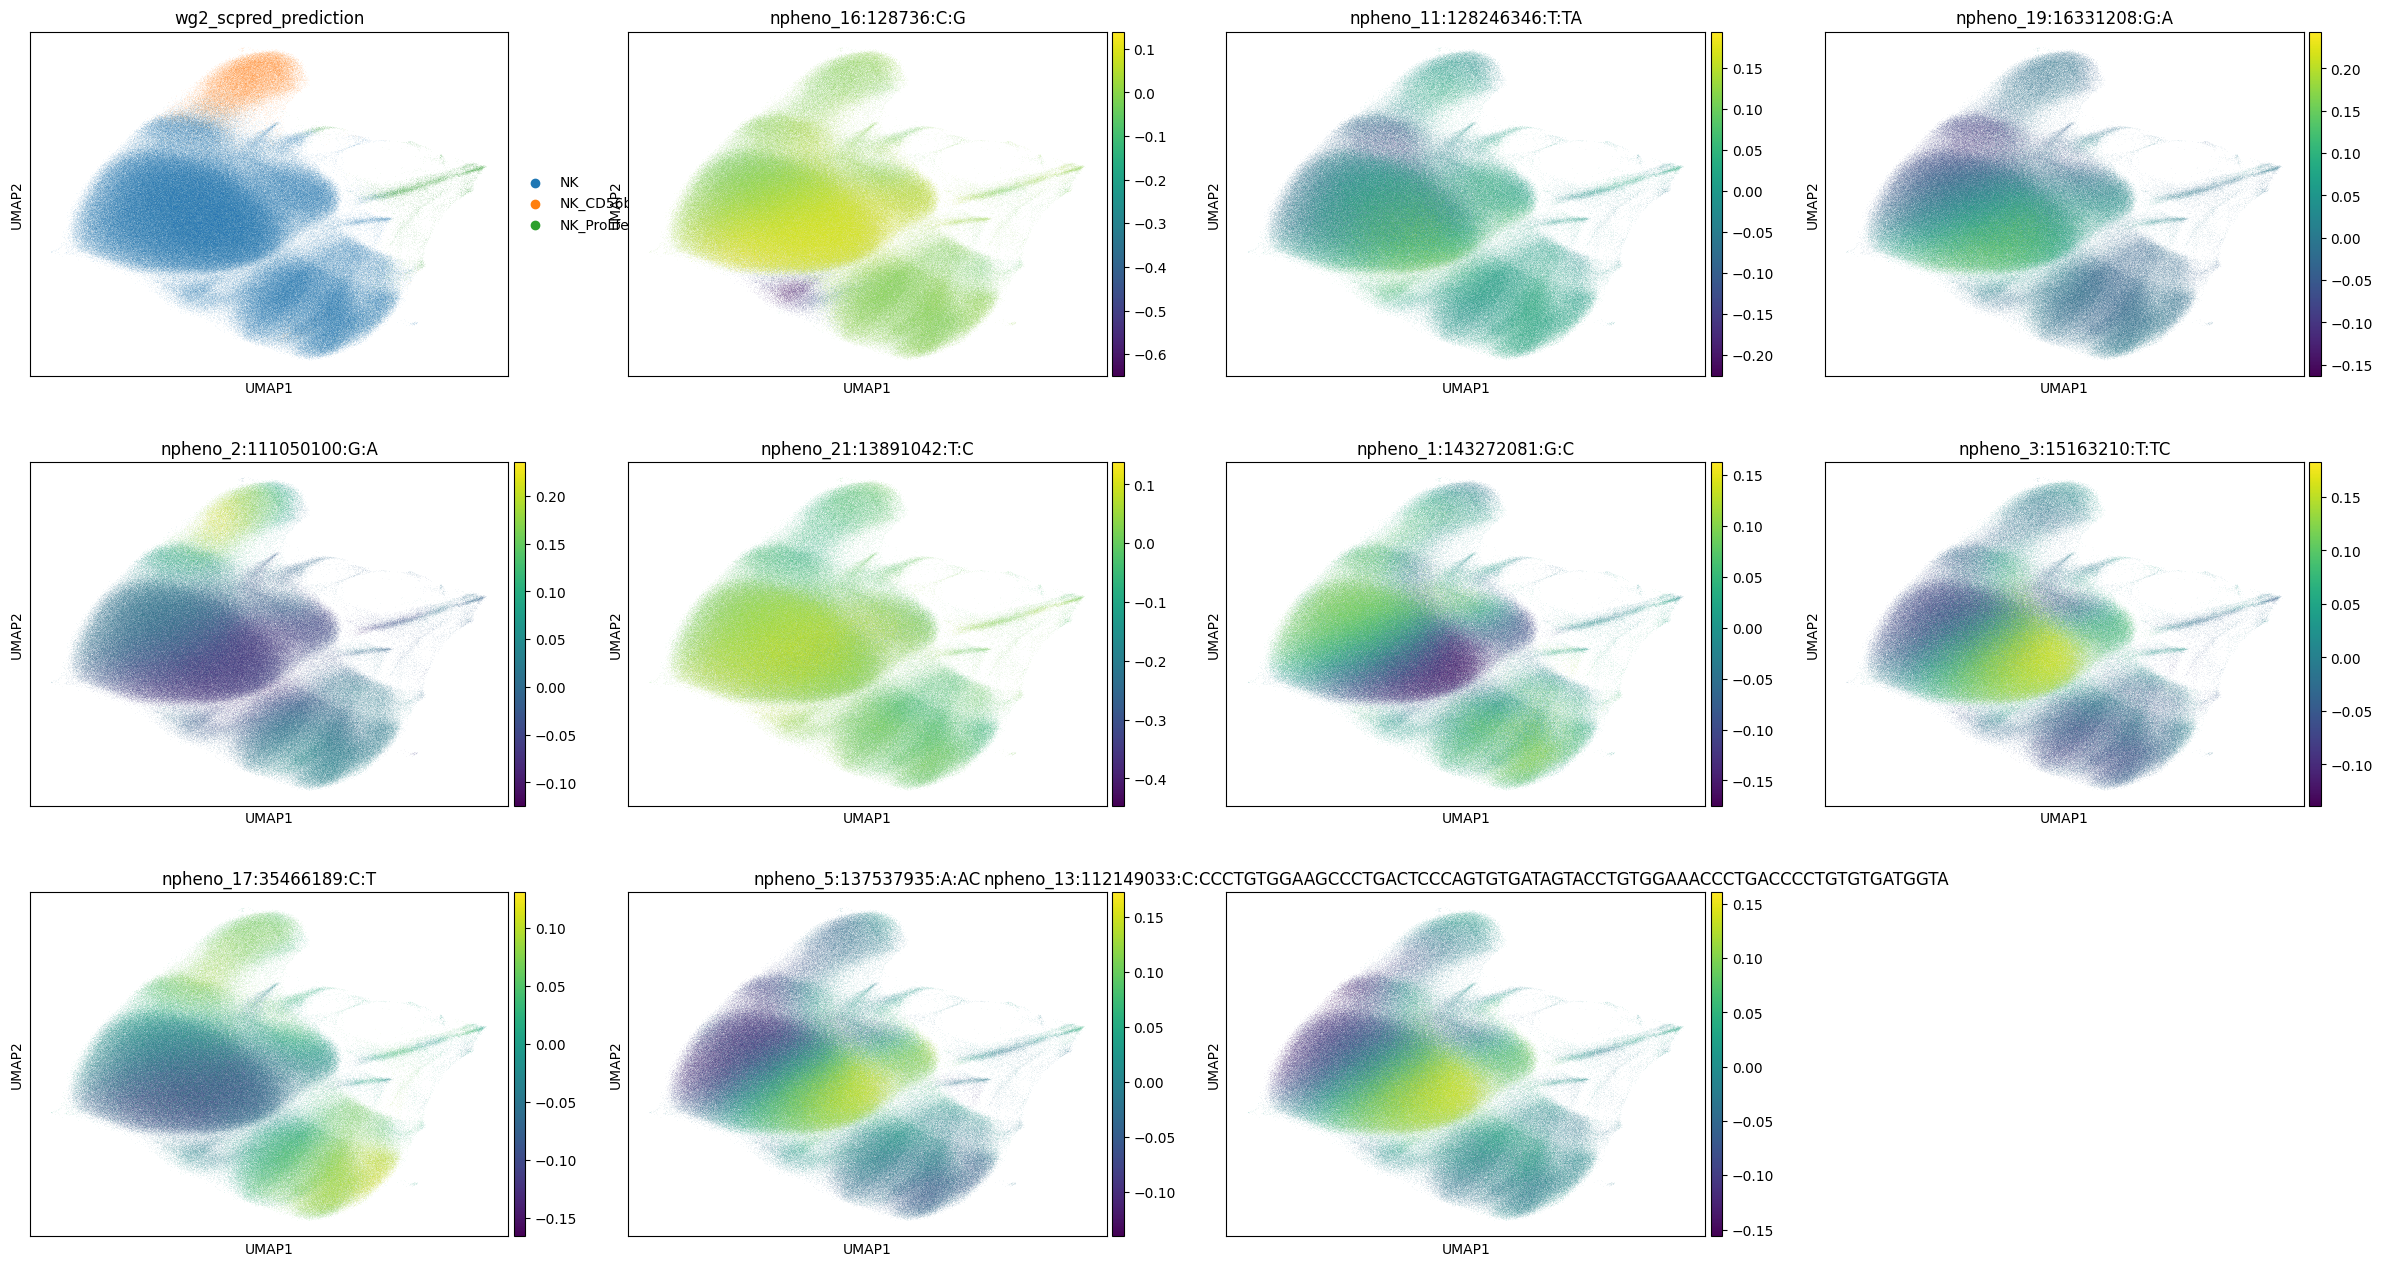

In [13]:
# plot neighbourhood abundance correllations
top_10_csaQTL = [
    "npheno_16:128736:C:G",
    "npheno_11:128246346:T:TA",
    "npheno_19:16331208:G:A",
    "npheno_2:111050100:G:A",
    "npheno_21:13891042:T:C",
    "npheno_1:143272081:G:C",
    "npheno_3:15163210:T:TC",
    "npheno_17:35466189:C:T",
    "npheno_5:137537935:A:AC",
    "npheno_13:112149033:C:CCCTGTGGAAGCCCTGACTCCCAGTGTGATAGTACCTGTGGAAACCCTGACCCCTGTGTGATGGTA",
]

sc.pl.umap(madata, color=["wg2_scpred_prediction"] + top_10_csaQTL)

# Validation - replicating Onek1k csaQTLs

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


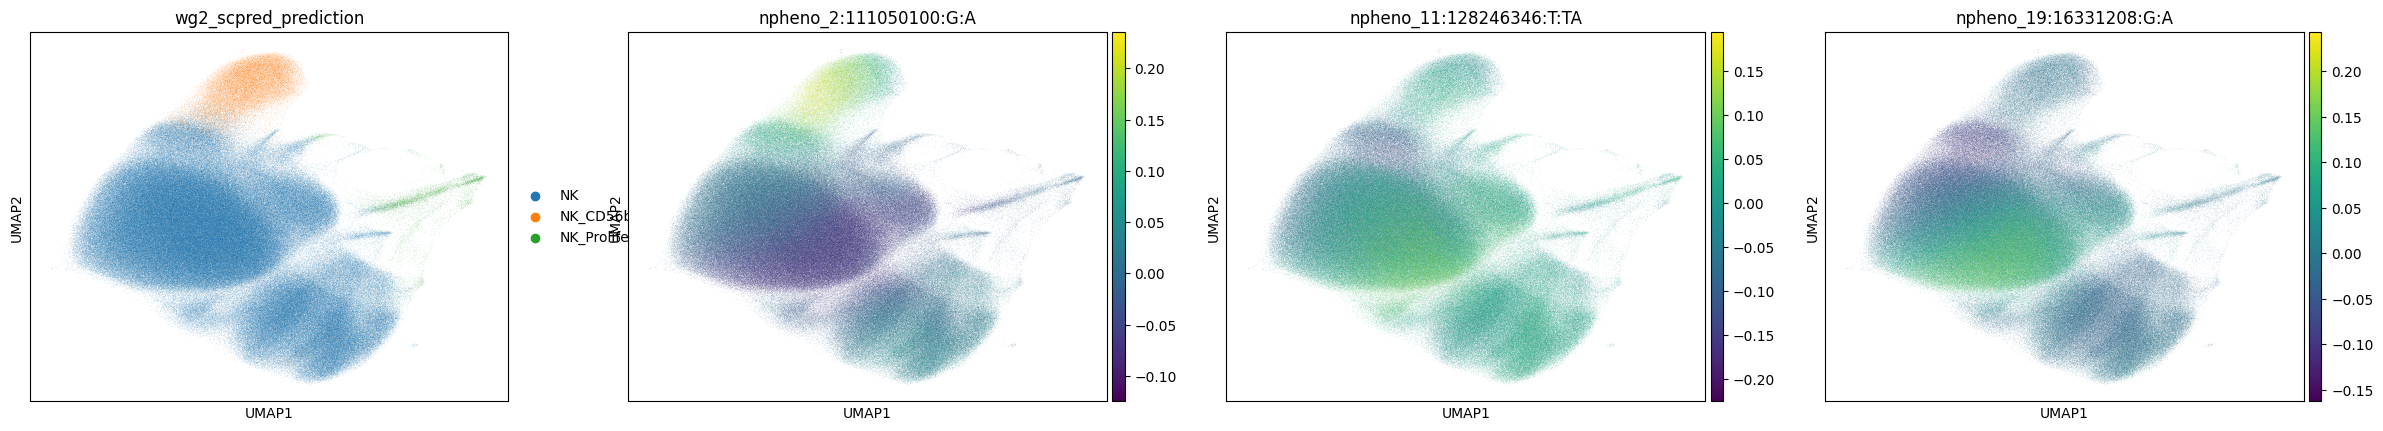

In [14]:
onek1k_intersecting_nk = [
    "npheno_2:111050100:G:A",
    "npheno_11:128246346:T:TA",     # "11:128246346:T:T" in GeNA paper 
    "npheno_19:16331208:G:A",
]
sc.pl.umap(madata, color=["wg2_scpred_prediction"] + onek1k_intersecting_nk)

In [18]:
madata.samplem.columns

Index(['sex', 'age', 'geno_PC1', 'geno_PC2', 'geno_PC3', 'geno_PC4',
       'geno_PC5', 'geno_PC6', 'geno_PC7', 'geno_PC8', 'geno_PC9', 'geno_PC10',
       'geno_PC11', 'geno_PC12', 'geno_PC13', 'geno_PC14', 'geno_PC15',
       'geno_PC16', 'sample_perm0', 'sample_perm1', 'sample_perm2',
       'sample_perm3', 'sample_perm4', 'sample_perm5', 'sample_perm6',
       'sample_perm7', 'sample_perm8', 'sample_perm9', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
       'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21',
       'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30',
       'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39',
       'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48',
       'PC49', 'PC50', 'BioHEART', 'total_counts', 'pct_counts_mt',
       '16:128736:C:G', '11:128246346:T:TA', '19:16331208:G:A',
       '2:111050100:G:A', '21:13891042:T:C'

In [17]:
variant = "2:111050100:G:A"
sample_pheno = madata.samplem[[f"spheno_{variant}", variant]]
sample_pheno.index = madata.uns["NAM_sampleXpc"].index

# Convert dosage from numeric encoding to actual genotypes
genotypes_dict = {v: v.split(":")[2:4] for v in variant_id_list}

def geno_to_letters(ref, alt, geno):
    if geno == 0:
        out = f"{ref}/{ref}"
    elif geno == 1:
        out = f"{ref}/{alt}"
    elif geno == 2:
        out = f"{alt}/{alt}"
    elif geno == -9:
        out = "Missing genotype"
    return out

ref, alt = genotypes_dict[variant]

sample_pheno["Genotype"] = [
    geno_to_letters(ref, alt, g) for g in sample_pheno[variant]
]

KeyError: "['spheno_2:111050100:G:A'] not in index"

In [ ]:
def csaqtl_boxplot(madata, variant_id_list):

    for variant in variant_id_list:
        variant = "2:111050100:G:A"
        sample_pheno = madata.samplem[[f"npheno_{variant}", variant]]
        sample_pheno.index = madata.uns["NAM_sampleXpc"].index

        # Convert dosage from numeric encoding to actual genotypes
        genotypes_dict = {v: v.split(":")[2:4] for v in variant_id_list}

        def geno_to_letters(ref, alt, geno):
            if geno == 0:
                out = f"{ref}/{ref}"
            elif geno == 1:
                out = f"{ref}/{alt}"
            elif geno == 2:
                out = f"{alt}/{alt}"
            elif geno == -9:
                out = "Missing genotype"
            return out

        ref, alt = genotypes_dict[variant]

        sample_pheno["Genotype"] = [
            geno_to_letters(ref, alt, g) for g in sample_pheno[variant]
        ]

        plot_order = [f"{ref}/{ref}", f"{ref}/{alt}", f"{alt}/{alt}"]

        sns.set_theme(style="darkgrid")
        ax = sns.boxplot(
            data=sample_pheno,
            x=f"{variant}",
            y="Sample-level phenotype",
            showfliers=False,
            order=plot_order
        )
        ax = sns.swarmplot(
            data=sample_pheno,
            x=f"{variant}",
            y="Sample-level phenotype",
            color="grey",
            size=1,
            # order=plot_order,
        ).set(title=f"{celltype}, P = {P}, {permuted}")
        # plt.savefig(
        #     fname=f"{figdir}/{resolution}/boxplots/intersections_real_geno/{celltype}_{analysis_name}_{variant}_intersecting_curated_deficiency_genes_box_plot.png",
        #     dpi=300,
        # )
        # plt.clf()
        plt.show()

Here we can see replication of the csaQTL discovered in the onek1k cohort. This is most obvious for 2:111050100:G:A, where the alternate allele is associated with expansion of the NK CD65 bright cells. 

# Exploring csaQTL intersecting Tcell Abundance GWAS

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


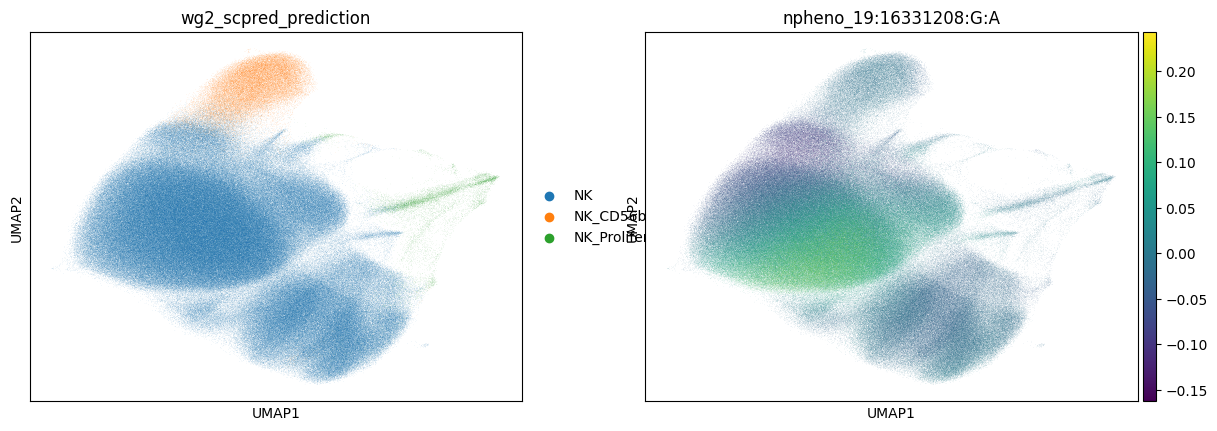

In [7]:
sc.pl.umap(madata, color=["wg2_scpred_prediction", "npheno_19:16331208:G:A"])